### 1.Define a doubly linked list 


In [1]:
class Node:
    def __init__(self, data):
        self.data = data
        self.prev = None
        self.next = None

class DoublyLinkedList:
    def __init__(self):
        self.head = None


This defines:

Node with data, prev (previous node), and next (next node).

DoublyLinkedList with a head pointing to the start of the list.

### 2. Write a function to reverse a linked list in-place

In [4]:
def reverse_linked_list(head):
    prev = None
    current = head
    while current:
        next_node = current.next
        current.next = prev
        prev = current
        current = next_node
    return prev



### 3. Detect Cycle in a Linked List


In [7]:
def has_cycle(head):
    slow = fast = head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow == fast:
            return True
    return False


### 4. Merge Two Sorted Linked Lists
 1->3->5->6->null and 2->4->6->8->null should be merged to make
 1->2->3->4->5->6->7->8

In [14]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def merge_sorted_lists(l1, l2):
    dummy = tail = Node(0)
    while l1 and l2:
        if l1.data < l2.data:
            tail.next = l1
            l1 = l1.next
        else:
            tail.next = l2
            l2 = l2.next
        tail = tail.next
    tail.next = l1 or l2
    return dummy.next

# Helper function to print the linked list
def print_list(node):
    while node:
        print(node.data, end=" -> ")
        node = node.next
    print("null")

# Creating the first linked list: 1->3->5->6->null
l1 = Node(1)
l1.next = Node(3)
l1.next.next = Node(5)
l1.next.next.next = Node(6)

# Creating the second linked list: 2->4->6->8->null
l2 = Node(2)
l2.next = Node(4)
l2.next.next = Node(6)
l2.next.next.next = Node(8)

# Merging the two lists
merged_list = merge_sorted_lists(l1, l2)

# Printing the merged list
print_list(merged_list)


1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 6 -> 8 -> null


### 5. Remove Nth Node from End
 1->2->3->4->5->6, removing 2nd node from end will return 1->2->3->4->6

In [17]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def remove_nth_from_end(head, n):
    dummy = Node(0)
    dummy.next = head
    slow = fast = dummy
    for _ in range(n):
        fast = fast.next
    while fast.next:
        fast = fast.next
        slow = slow.next
    slow.next = slow.next.next
    return dummy.next

# Helper function to print the linked list
def print_list(node):
    while node:
        print(node.data, end=" -> ")
        node = node.next
    print("null")

# Creating the linked list: 1->2->3->4->5->6
head = Node(1)
head.next = Node(2)
head.next.next = Node(3)
head.next.next.next = Node(4)
head.next.next.next.next = Node(5)
head.next.next.next.next.next = Node(6)

# Removing the 2nd node from the end
new_head = remove_nth_from_end(head, 2)

# Printing the modified list
print_list(new_head)


1 -> 2 -> 3 -> 4 -> 6 -> null


###  6. Remove Duplicates from Sorted Linked List

 1->2->3->3->4->4->4->5  should be changed to 1->2->3->4->5

In [19]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def remove_duplicates(head):
    current = head
    while current and current.next:
        if current.data == current.next.data:
            current.next = current.next.next
        else:
            current = current.next
    return head

# Helper function to print the linked list
def print_list(node):
    while node:
        print(node.data, end=" -> ")
        node = node.next
    print("null")

# Creating the linked list: 1->2->3->3->4->4->4->5
head = Node(1)
head.next = Node(2)
head.next.next = Node(3)
head.next.next.next = Node(3)
head.next.next.next.next = Node(4)
head.next.next.next.next.next = Node(4)
head.next.next.next.next.next.next = Node(4)
head.next.next.next.next.next.next.next = Node(5)

# Removing duplicates
new_head = remove_duplicates(head)

# Printing the modified list
print_list(new_head)


1 -> 2 -> 3 -> 4 -> 5 -> null


### 7. Find Intersection of Two Linked Lists 
 1->2->3->4->8->6->9  5->1->6->7  , intersection 1->6

In [20]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def get_intersection_node(headA, headB):
    nodes = set()
    while headA:
        nodes.add(headA)
        headA = headA.next
    while headB:
        if headB in nodes:
            return headB
        headB = headB.next
    return None

# Helper function to print the intersection node
def print_intersection(node):
    if node:
        print(f"Intersection at node with value: {node.data}")
    else:
        print("No intersection")

# Creating the first linked list: 1->2->3->4->8->6->9
headA = Node(1)
headA.next = Node(2)
headA.next.next = Node(3)
headA.next.next.next = Node(4)
headA.next.next.next.next = Node(8)
headA.next.next.next.next.next = Node(6)
headA.next.next.next.next.next.next = Node(9)

# Creating the second linked list: 5->1->6->7
headB = Node(5)
headB.next = Node(1)
headB.next.next = headA.next.next.next.next  # Pointing to node with value 6 (intersection)

# Finding the intersection node
intersection_node = get_intersection_node(headA, headB)

# Printing the intersection node
print_intersection(intersection_node)


Intersection at node with value: 8


###  8. Rotate Linked List by K Positions to Right
 1->2->3->4->8->6->9 , after rotating for 2 times becomes , 3->4->8->6->9->1->2

In [25]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def rotate_right(head, k):
    # If the list is empty or contains a single node, no rotation is needed
    if not head or not head.next:
        return head
    
    # Step 1: Calculate the length of the linked list and get the tail
    length = 1
    tail = head
    while tail.next:
        tail = tail.next
        length += 1
    
    # Step 2: Normalize k to prevent unnecessary rotations
    k %= length
    if k == 0:
        return head

    # Step 3: Find the new tail (length - k - 1 steps) and the new head
    slow = head
    for _ in range(length - k - 1):
        slow = slow.next
    
    # The new head is the next node of the slow pointer
    new_head = slow.next
    slow.next = None
    
    # Attach the old tail to the original head
    tail.next = head

    return new_head

# Helper function to print the linked list
def print_list(node):
    while node:
        print(node.data, end=" -> ")
        node = node.next
    print("null")

# Creating the linked list: 1 -> 2 -> 3 -> 4 -> 8 -> 6 -> 9
head = Node(1)
head.next = Node(2)
head.next.next = Node(3)
head.next.next.next = Node(4)
head.next.next.next.next = Node(8)
head.next.next.next.next.next = Node(6)
head.next.next.next.next.next.next = Node(9)

# Rotating the list by 2 positions to the right
new_head = rotate_right(head, 2)

# Printing the rotated list
print_list(new_head)


6 -> 9 -> 1 -> 2 -> 3 -> 4 -> 8 -> null


### 9. Add Two Numbers Represented by Linked Lists 
 Given two non-empty linked lists representing two non-negative integers, where the digits are stored in 
reverse order, add the two numbers and return it as a linked list.

In [26]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def add_two_numbers(l1, l2):
    # Create a dummy node to simplify edge cases
    dummy_head = Node(0)
    current = dummy_head
    carry = 0
    
    # Traverse both lists
    while l1 or l2 or carry:
        # Get the values of the nodes, if any
        val1 = l1.data if l1 else 0
        val2 = l2.data if l2 else 0
        
        # Calculate sum and carry
        total = val1 + val2 + carry
        carry = total // 10
        current.next = Node(total % 10)  # Create new node with the sum's last digit
        current = current.next
        
        # Move to the next nodes in the lists
        if l1:
            l1 = l1.next
        if l2:
            l2 = l2.next
    
    return dummy_head.next

# Helper function to print the linked list
def print_list(node):
    while node:
        print(node.data, end=" -> ")
        node = node.next
    print("null")

# Helper function to create a linked list from a list of numbers
def create_linked_list(lst):
    head = Node(lst[0])
    current = head
    for num in lst[1:]:
        current.next = Node(num)
        current = current.next
    return head

# Test case 1: 342 + 465
l1 = create_linked_list([2, 4, 3])  # Represents 342
l2 = create_linked_list([5, 6, 4])  # Represents 465

# Adding the numbers
result = add_two_numbers(l1, l2)

# Printing the result
print_list(result)  # Expected output: 7 -> 0 -> 8 (807)



7 -> 0 -> 8 -> null


###  10.Clone a Linked List with next and Random Pointer 
 Given a linked list of size N where each node has two links: one pointer points to the next node and the 
second pointer points to any node in the list. The task is to create a clone of this linked list in O(N) time. 

Note: The pointer pointing to the next node is ‘next‘ pointer and the one pointing to an arbitrary node is 
called ‘arbit’ pointer as it can point to any arbitrary node in the linked list. 
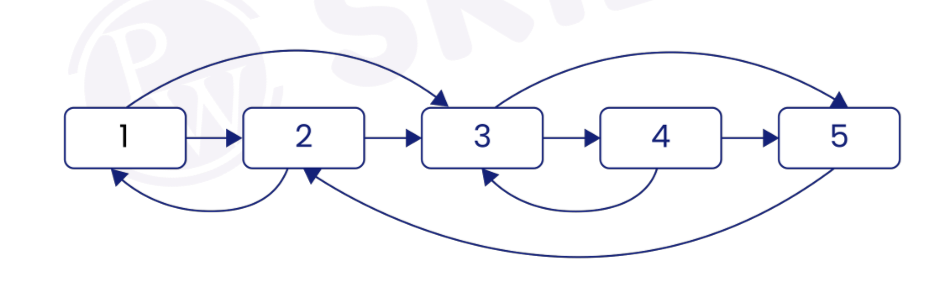

In [28]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None
        self.arbit = None  # Random pointer to any node in the list

def clone_linked_list(head):
    if not head:
        return None
    
    # Step 1: Insert cloned nodes between original nodes
    curr = head
    while curr:
        clone_node = Node(curr.data)
        clone_node.next = curr.next
        curr.next = clone_node
        curr = clone_node.next
    
    # Step 2: Set the arbit pointers for the cloned nodes
    curr = head
    while curr:
        if curr.arbit:
            curr.next.arbit = curr.arbit.next
        curr = curr.next.next
    
    # Step 3: Separate the original and cloned lists
    curr = head
    cloned_head = head.next
    while curr:
        clone_node = curr.next
        curr.next = clone_node.next
        if clone_node.next:
            clone_node.next = clone_node.next.next
        curr = curr.next
    
    return cloned_head

# Function to print the linked list (for testing)
def print_list(head):
    curr = head
    while curr:
        arbit_data = curr.arbit.data if curr.arbit else None
        print(f"Data: {curr.data}, Arbit: {arbit_data}")
        curr = curr.next

# Example usage:
if __name__ == "__main__":
    # Creating a sample linked list
    head = Node(1)
    head.next = Node(2)
    head.next.next = Node(3)
    head.next.next.next = Node(4)
    
    head.arbit = head.next.next  # Arbitrary pointer of first node points to third node
    head.next.arbit = head      # Arbitrary pointer of second node points to first node
    head.next.next.arbit = head.next.next.next  # Arbitrary pointer of third node points to fourth node
    
    print("Original List:")
    print_list(head)
    
    # Cloning the linked list
    cloned_head = clone_linked_list(head)
    
    print("\nCloned List:")
    print_list(cloned_head)


Original List:
Data: 1, Arbit: 3
Data: 2, Arbit: 1
Data: 3, Arbit: 4
Data: 4, Arbit: None

Cloned List:
Data: 1, Arbit: 3
Data: 2, Arbit: 1
Data: 3, Arbit: 4
Data: 4, Arbit: None
